## Flood Simulation



In [1]:
import os
import ee
import geemap
ee.Initialize()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cv2
import glob

### Create an interactive map

In [10]:
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

### Extract elevation 

In [11]:
zim_map = geemap.shp_to_ee('./data/zim_map.shp')

In [12]:
Map = geemap.Map(center=(-19, 30), zoom=6)

dem = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

Map.addLayer(dem.clip(zim_map), vis_params, 'SRTM DEM')
Map.addLayer(zim_map, {}, "Zim Box")

colors = vis_params['palette']
vmin = vis_params['min']
vmax = vis_params['max']

Map.add_colorbar(vis_params, label="Elevation (m)", layer_name="SRTM DEM")
Map

Map(center=[-19, 30], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(To…

In [13]:
Map.add_colorbar(
    vis_params, label="Elevation (m)", layer_name="SRTM DEM", orientation="vertical"
)

In [14]:
zim_dem = dem.clipToBoundsAndScale(geometry=zim_map, scale=1000).visualize(min=0,max= 4000,palette=['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'])

In [15]:
zim_dem = dem.clipToBoundsAndScale(geometry=zim_map, scale=1000)

In [16]:
geemap.ee_export_image(zim_dem, filename='./data/zim_dem.tif')

Generating URL ...
Please wait ...
Data downloaded to C:\Users\clive\Desktop\geo\learning\data\zim_dem.tif


In [17]:
geemap.ee_to_shp(zim_map, filename='./data/zim_map.shp')

Generating URL ...
Please wait ...
Data downloaded to C:\Users\clive\Desktop\geo\learning\data\zim_map.shp


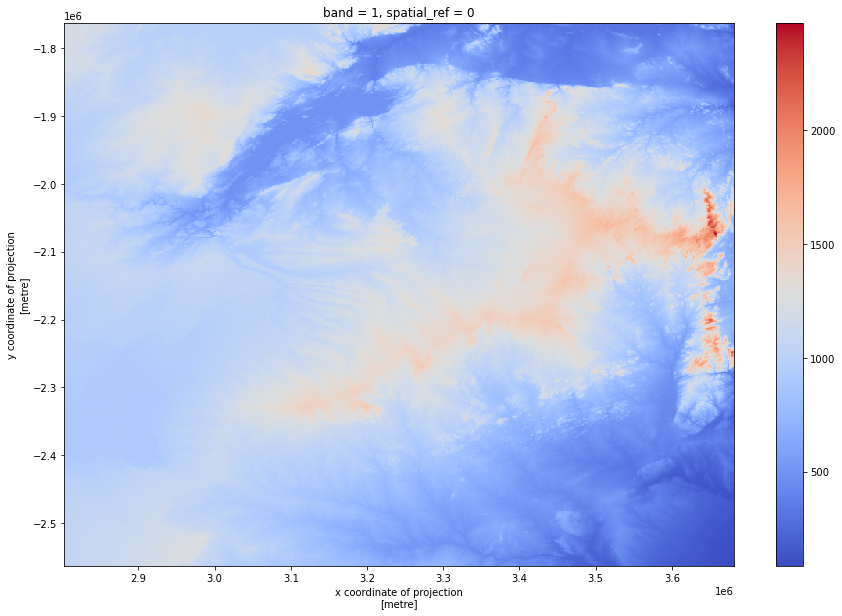

In [18]:
geemap.plot_raster('data/zim_dem.tif', cmap='coolwarm', figsize=(15, 10))

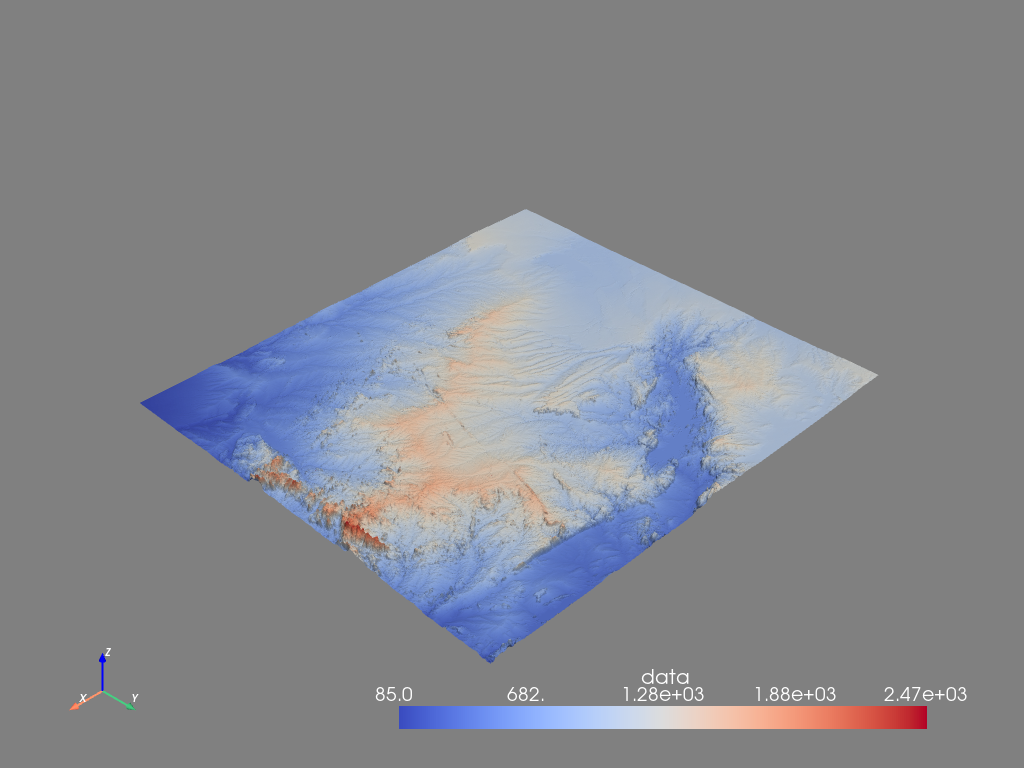

In [19]:
geemap.plot_raster_3d('data/zim_dem.tif', factor=15, cmap='coolwarm', background='gray')


In [20]:
zim_dem = dem.clipToBoundsAndScale(geometry=zim_map, scale=2000)

In [21]:
#size limitation
rgb_img = geemap.ee_to_numpy(zim_dem)
print(rgb_img.shape)

(379, 440, 1)


In [22]:
np.min(rgb_img)

85

In [23]:
np.max(rgb_img)

2411

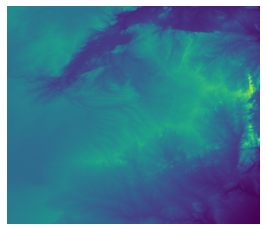

In [29]:
for h in range(80, 2000, 20):
    #where temp_img is less than temp_base update with temp_base
    rgb_img[rgb_img < h] = h
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.savefig('data/flood/'+str(h)+'.png')

plt.imshow(geemap.ee_to_numpy(zim_dem))
plt.axis('off')
plt.show()

In [30]:

image_folder = 'data/flood'
video_name = 'data/flood_video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 5, (width,height))

for image in range(80, 2000, 10):
    video.write(cv2.imread(os.path.join(image_folder, str(image) + ".png")))

cv2.destroyAllWindows()
video.release()

In [31]:
from IPython.display import HTML
HTML('<img src="data/flood.gif">')